In [4]:
import numpy as np 
import pandas as pd
import datetime

from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

# plots
import matplotlib.pyplot as plt
# import seaborn as sns
%matplotlib inline

In [5]:
stations = pd.read_csv("/home/mfp/Escritorio/ORGANIZACION DE DATOS/Dataset/station.csv")
stations.head()

,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013


In [6]:
print 'Cantidad de estaciones: ' +  str(len(stations.id.unique()))

Cantidad de estaciones: 70


In [7]:
#Los nombres de las 70 estaciones son: 
print (stations.name.unique())

['San Jose Diridon Caltrain Station' 'San Jose Civic Center'
 'Santa Clara at Almaden' 'Adobe on Almaden' 'San Pedro Square'
 'Paseo de San Antonio' 'San Salvador at 1st' 'Japantown'
 'San Jose City Hall' 'MLK Library' 'SJSU 4th at San Carlos'
 'St James Park' 'Arena Green / SAP Center' 'SJSU - San Salvador at 9th'
 'Franklin at Maple' 'Redwood City Caltrain Station'
 'San Mateo County Center' 'Redwood City Public Library'
 'Stanford in Redwood City' 'Redwood City Medical Center'
 'Mountain View City Hall' 'Mountain View Caltrain Station'
 'San Antonio Caltrain Station' 'Evelyn Park and Ride'
 'San Antonio Shopping Center' 'Castro Street and El Camino Real'
 'Rengstorff Avenue / California Street' 'Palo Alto Caltrain Station'
 'University and Emerson' 'California Ave Caltrain Station'
 'Cowper at University' 'Park at Olive' 'Clay at Battery'
 'Davis at Jackson' 'Commercial at Montgomery' 'Washington at Kearney'
 'Post at Kearney' 'Embarcadero at Vallejo' 'Spear at Folsom'
 'Harry Bridg

In [8]:
print 'Cantidad de espacios para estacionar las bicis: ' + str(stations.dock_count.sum())

Cantidad de espacios para estacionar las bicis: 1236


In [9]:
#Analizar las instalaciones que no fueron todas en simultaneo...

In [10]:
df = pd.read_csv("/home/mfp/Escritorio/ORGANIZACION DE DATOS/Dataset/trip.csv")
df.start_date = pd.to_datetime(df.start_date, format='%m/%d/%Y %H:%M')
df.end_date = pd.to_datetime(df.end_date, format='%m/%d/%Y %H:%M')
df.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,2013-08-29 10:17:00,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,2013-08-29 11:29:00,San Jose City Hall,10,2013-08-29 11:30:00,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,Subscriber,94103


In [11]:
#Las duraciones estan en segundos, para el analisis paso a segundo.
df.duration /= 60
df.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,1.050000,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,94127
1,4607,1.166667,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,Subscriber,95138
2,4130,1.183333,2013-08-29 10:16:00,Mountain View City Hall,27,2013-08-29 10:17:00,Mountain View City Hall,27,48,Subscriber,97214
3,4251,1.283333,2013-08-29 11:29:00,San Jose City Hall,10,2013-08-29 11:30:00,San Jose City Hall,10,26,Subscriber,95060
4,4299,1.383333,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,Subscriber,94103


In [12]:
# Analizamos si hay datos nulos
df.isnull().sum()

id                       0
duration                 0
start_date               0
start_station_name       0
start_station_id         0
end_date                 0
end_station_name         0
end_station_id           0
bike_id                  0
subscription_type        0
zip_code              6619
dtype: int64

In [13]:
# Analisis general de todos los viajes
df.describe()

,id,duration,start_station_id,end_station_id,bike_id
count,669959.000000,669959.000000,669959.000000,669959.000000,669959.000000
mean,460382.009899,18.465831,57.851876,57.837438,427.587620
std,264584.458487,370.923950,17.112474,17.200142,153.450988
min,4069.000000,1.000000,2.000000,2.000000,9.000000
25%,231082.500000,5.733333,50.000000,50.000000,334.000000
50%,459274.000000,8.616667,62.000000,62.000000,440.000000
75%,692601.000000,12.583333,70.000000,70.000000,546.000000
max,913460.000000,287840.000000,84.000000,84.000000,878.000000


In [14]:
# Tenemos un minimo de 1 minuto, lo que no va a ser considerado como viaje.
# y un maximo de 287840 lo que corresponde a 199.9 dias 
# Por lo tanto vamos a graficar las duraciones por viaje para identificar valores outliers y luego recortar esos datos

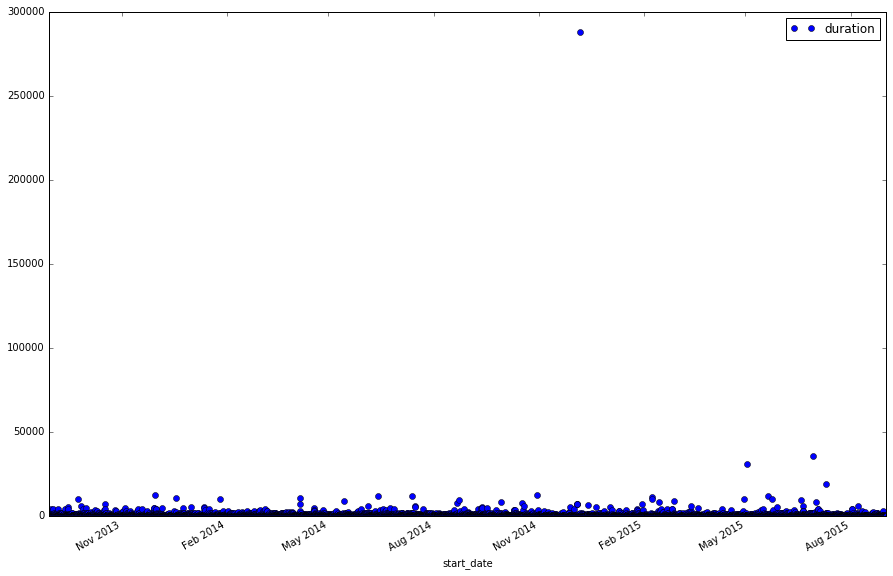

In [15]:
df.plot(x='start_date' , y = 'duration', style='o',figsize=(15,10))

plt.show()

In [16]:
# Analizando el grafico y los valores que tiro el df.duration.describe()
# Vamos a recortar aquellos viajes cuya duracion sea menor a 370 minutos
# y mayor a 3 minutos

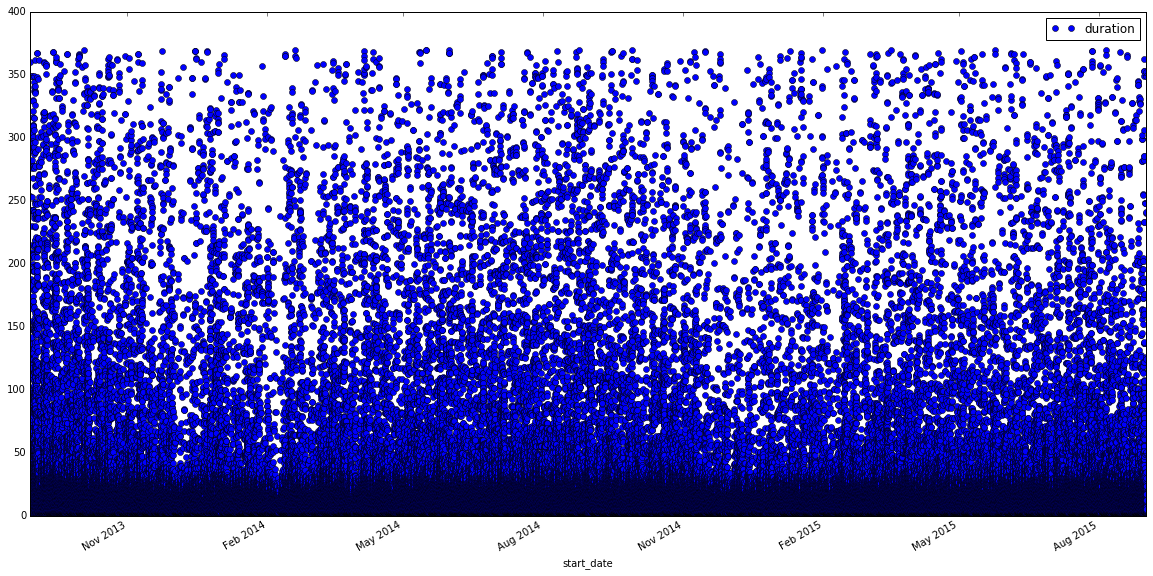

In [17]:
#Voy a crear mi propio data frame de entrenamiento, a medida que voy necesitando datos agrego columnas:
# train =  df[['duration','start_date','start_station_name','start_station_id','end_date','end_station_name','end_station_id','bike_id','subscription_type','zip_code']]
# train = df[['duration','start_date']]
# train = train[train.duration <= 370]
# train = train[train.duration >3]
df = df[df.duration <= 370]
df = df[df.duration >3]

df.plot(x='start_date' , y = 'duration', style='o',figsize=(20,10))

plt.show()

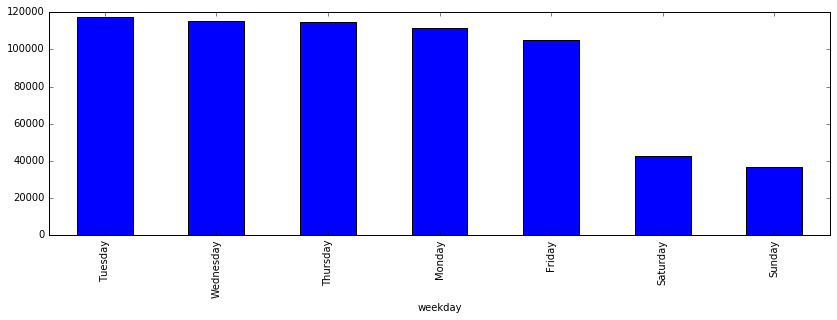

In [18]:
# Podemos ver una zona muy oscura entre los viajes de duracion entre 3 y 50 minutos
# Ahora vamos a analizar la cantidad de viajes contra los distintos dias de la semana

df['weekday'] =  pd.to_datetime(df['start_date']).dt.weekday_name
df.groupby('weekday').count()['start_date'].sort_values(ascending=False)[0:19].plot(kind='bar',figsize=(14,4));

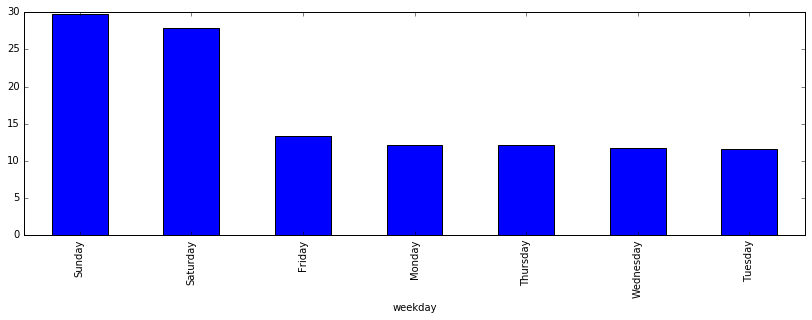

In [19]:
#Vemos que los fines de semana se realiazaron notablemente menor cantidad de viajes
#Podemos ahora analizar la duracion promedio de los viajes para cada dia de semana
df.groupby('weekday').mean()['duration'].sort_values(ascending=False)[0:7].plot(kind='bar',figsize=(14,4));

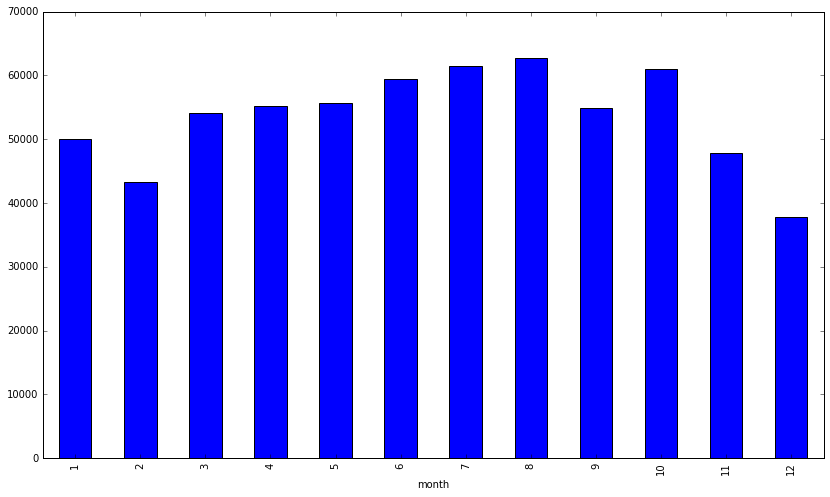

In [20]:
#El ultimo grafico nos muestra claramente que los fines de semana la duracion de los viajes es mucho
#mayor que la de los dias de semana

#Ahora analizemos la cantidad de viajes segun el mes 
df['month'] =  pd.to_datetime(df['start_date']).dt.month

df.groupby('month').count()['start_date'][0:12].plot(kind='bar',figsize=(14,8));

In [21]:
#Ahora podriamos ver el clima segun los meses para comprender mejor los resultados del grafico anterior
weather = pd.read_csv("/home/mfp/Escritorio/ORGANIZACION DE DATOS/Dataset/weather.csv")
weather['month'] =  pd.to_datetime(weather['date']).dt.month
weather.head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code,month
0,8/29/2013,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107,8
1,8/30/2013,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,7.0,29.0,13.0,35.0,0,2.0,NaN,291.0,94107,8
2,8/31/2013,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,...,10.0,26.0,15.0,31.0,0,4.0,NaN,284.0,94107,8
3,9/1/2013,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,10.0,25.0,13.0,29.0,0,4.0,NaN,284.0,94107,9
4,9/2/2013,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,...,6.0,23.0,12.0,30.0,0,6.0,NaN,277.0,94107,9


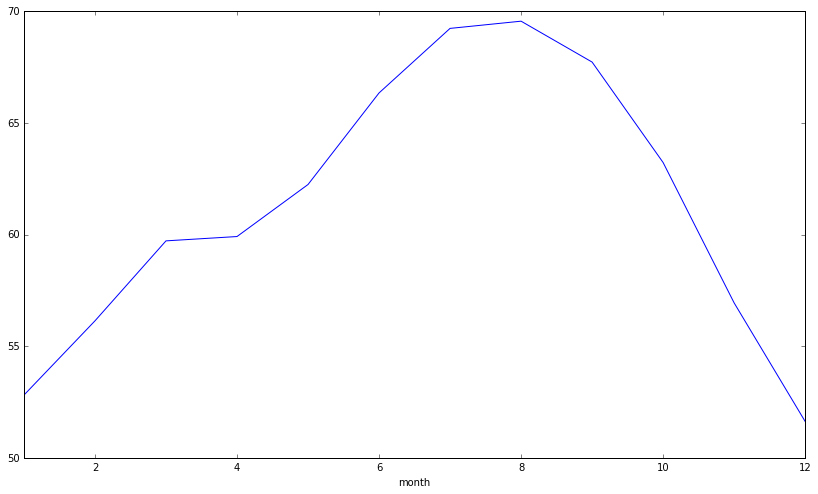

In [22]:
weather.groupby('month').mean()['mean_temperature_f'][0:12].plot(kind='line',figsize=(14,8));

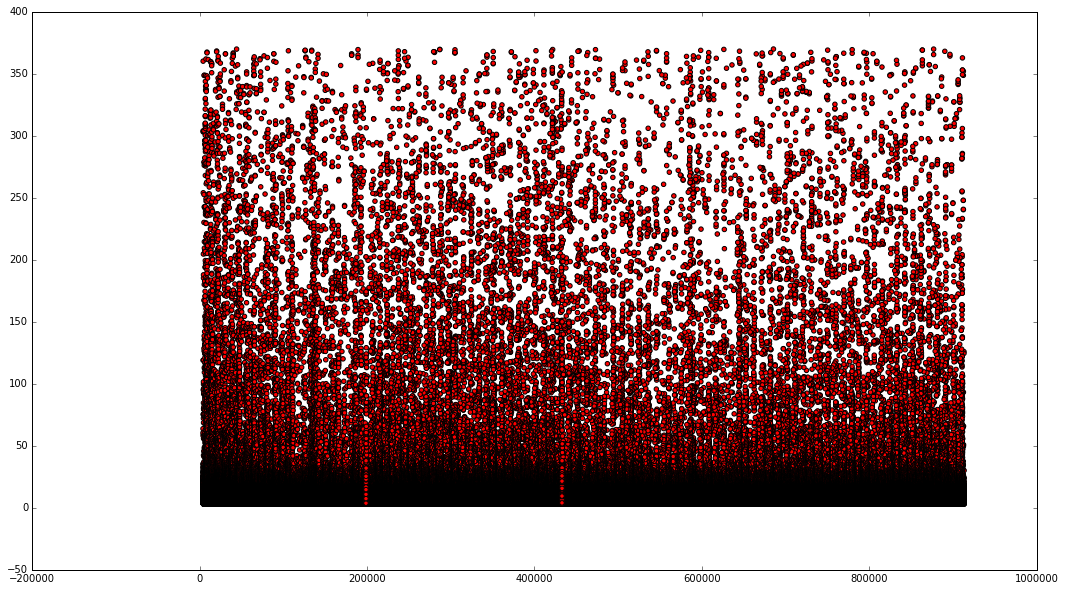

In [23]:
#Vemos que el promedio de temperaturas mas altas se registra entre los meses de junio y octubre,
#lo que coincide con el incremento en la cantidad de viajes en esos meses. 
#De todos modos no explicaria el pico de enero. 
#Lo que si podria explicarlo son los dias de vacaciones

calendar = USFederalHolidayCalendar()
holidays = calendar.holidays(start=df.start_date.min(), end=df.start_date.max())

# #Find all of the business days in our time span
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())
business_days = pd.DatetimeIndex(start=df.start_date.min(), end=df.start_date.max(), freq=us_bd)

business_days = pd.to_datetime(business_days, format='%Y/%m/%d').date
holidays = pd.to_datetime(holidays, format='%Y/%m/%d').date

# #A 'business_day' or 'holiday' is a date within either of the respected lists.
df['business_day'] = df.start_date.isin(business_days)
df['holiday'] = df.start_date.isin(holidays)


fig, ax = plt.subplots()

colors = {False:'red', True:'green'}


fig.set_size_inches(18, 10)
plt.scatter(df.id, df.duration, c=df.holiday.map(colors))
plt.show()


